# Car Price Prediction Model

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'car data.csv',
 'Car_Price_Prediction.ipynb',
 'EMAIL_Spam _detection.ipynb',
 'Iris.csv',
 'Iris_classification.html',
 'Iris_classification_files',
 'Iris_task1.ipynb',
 'spam.csv',
 'Unemployment in India.csv',
 'Unemployment _in _India_task2.ipynb',
 'Unemployment_Rate_upto_11_2020.csv',
 'Untitled.ipynb']

In [4]:
#Loading Datasets
df=pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#checking no of rows and cols
df.shape

(301, 9)

In [7]:
#getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#checking no of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
#checking distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1,'CNG':2}},inplace=True)

In [11]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
#Splitting data and target
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
#splitting training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [16]:
#loading linear regression model
lgm=LinearRegression()

In [17]:
lgm.fit(X_train,Y_train) 

LinearRegression()

In [21]:
#prediction on train data
t=lgm.predict(X_train)

In [22]:
#R squared Error
es=metrics.r2_score(Y_train,t)
print("R squared error:",es)

R squared error: 0.8796483009370207


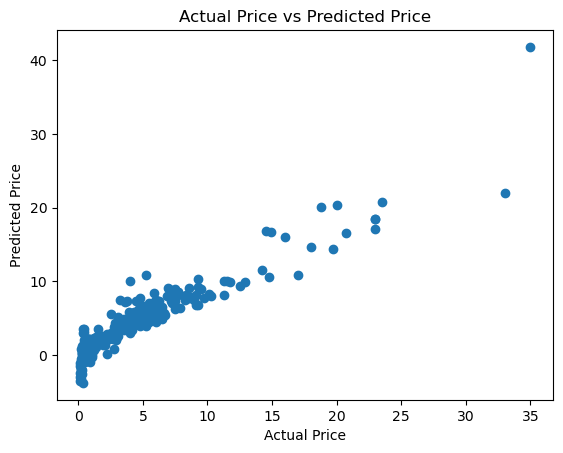

In [23]:
plt.scatter(Y_train,t)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [24]:
#prediction on test data
t1=lgm.predict(X_test)

In [25]:
#R squared Error
es1=metrics.r2_score(Y_test,t1)
print("R squared error:",es1)

R squared error: 0.8365861023212434


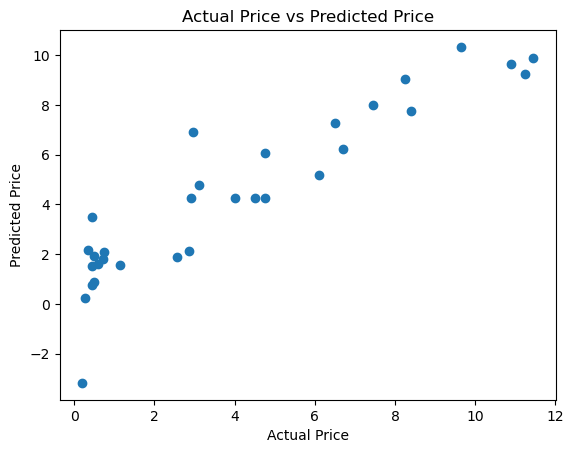

In [26]:
plt.scatter(Y_test,t1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [27]:
lsm=Lasso()

In [28]:
lsm.fit(X_train,Y_train)

Lasso()

In [29]:
#prediction on train data
t2=lsm.predict(X_train)

In [30]:
#R squared Error
es2=metrics.r2_score(Y_train,t2)
print("R squared error:",es2)

R squared error: 0.8424480718240743


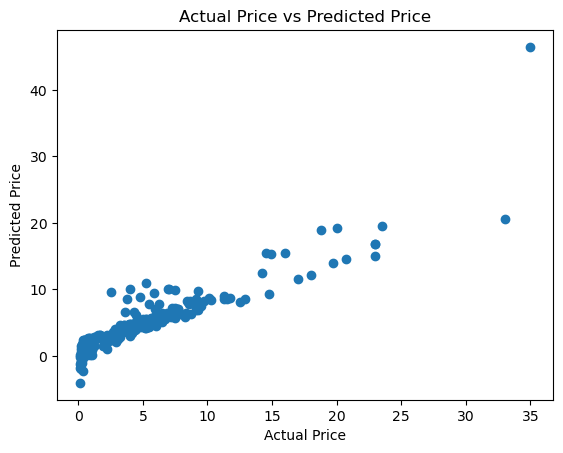

In [31]:
plt.scatter(Y_train,t2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [32]:
#prediction on test data
t3=lsm.predict(X_test)

In [33]:
#R squared Error
es3=metrics.r2_score(Y_test,t3)
print("R squared error:",es3)

R squared error: 0.8709763132343395


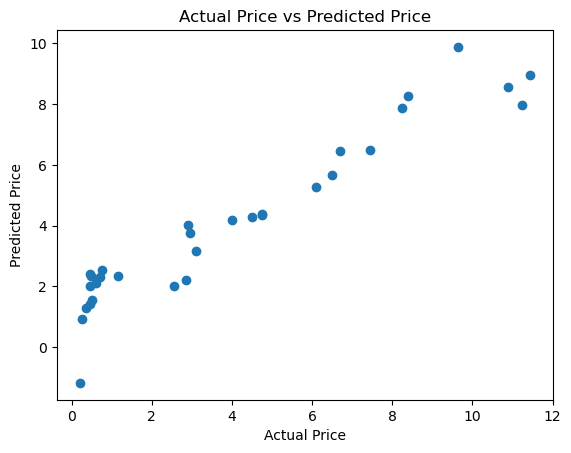

In [34]:
plt.scatter(Y_test,t3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()